# Predicting the customer churn in a bank
## Problem Statement:
For any customer centric organisation, customer churn/retention analysis is going to be extremely valuable. It is a market reality that the banks and other financial institutions are battling to attract each other's customers while retaining their own. Thus, Customer churn reduction is the central concern of most banking organisations as switching costs to the customer 
are low and acquisition cost to the organisation is high. Churn reduces profitability as it 
means potential loss of future revenue and also losing the invested costs of acquisition. On 
the other hand, long term customers contribute to profitability through mere continued association as they are less costly to serve and through additional services and referrals. It is important to have data that underlies construction of purchase decision and also the underlying 
loyalty hooks. So a good deal of marketing budget is allocated to engage customer on an 
ongoing basis and prevent churn by designing new plans and offering freebees, discounts 
etc. Thus, it is important to predict the customers who are likely to churn and develop appropriate modalities for retention. 
An international bank has a business problem with customer retention and observed high 
churn rates. The bank observed that alarming number of existing customers exit while it is 
getting increasingly difficult to acquire new customers. So they want to understand the hidden patterns in their customer behaviour by use of customer data which has early warning 
signs.This helps understand the drivers behind considering an alternative. The variables 
could be demographic, perception or behavioural. 
You are expected to create an analytical and modelling framework to predict the customer 
churn in a bank based on the quantitative and qualitative features provided in the datasets. 

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules
from sklearn.metrics import confusion_matrix, roc_curve, auc,recall_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
btrain = pd.read_excel("train_data-1578037482430.xlsx")
btest =  pd.read_excel("test_data-1578037501169.xlsx")

In [3]:
btrain.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


In [7]:
Obtrain = pd.read_excel("train_data-1578037482430.xlsx")
Obtest =  pd.read_excel("test_data-1578037501169.xlsx")

In [6]:
btrain.describe(include = 'O')

,CustomerID,CustomerName,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse
count,7360,7360,7360,7360,7360,7360,7360,7360
unique,7360,7360,2,3,4,3,7,3
top,C5814651,Name_5814651,Male,Location11,primary,single,admin.,no
freq,1,1,3994,3693,1864,2559,3207,3684


In [8]:
btrain.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
btrain.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

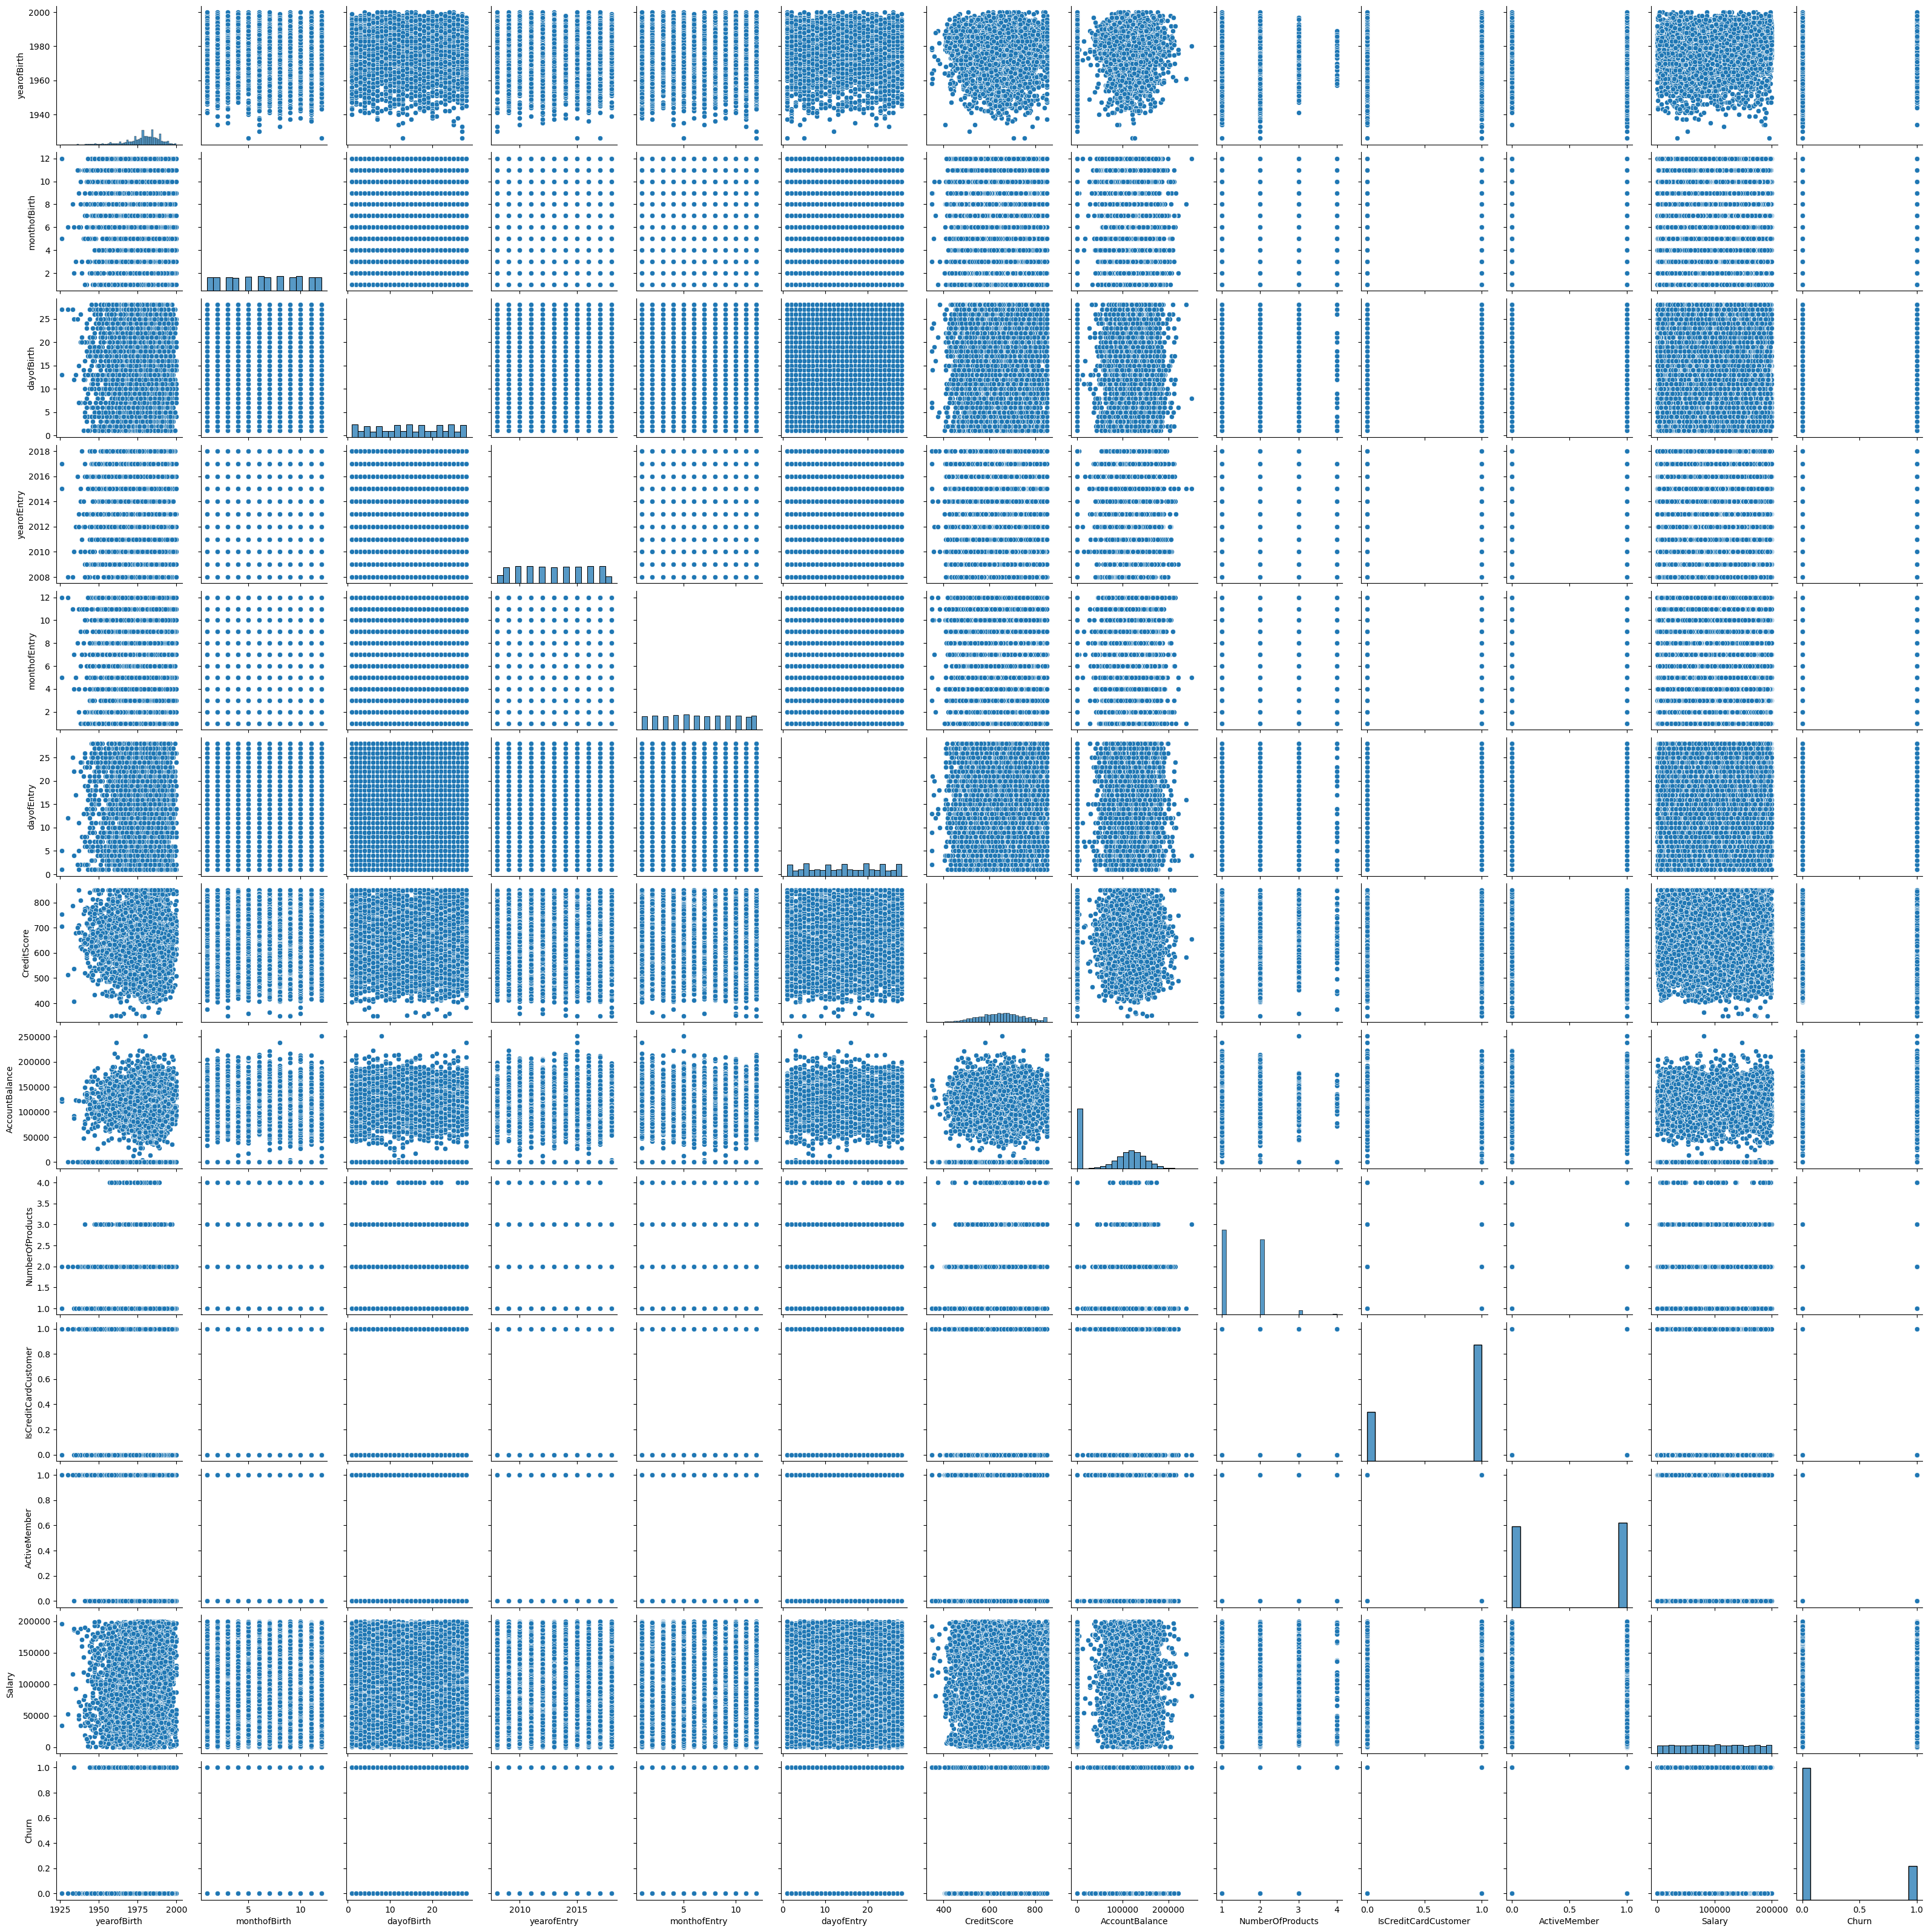

In [10]:
import seaborn
seaborn.pairplot(btrain)

In [266]:
import pandas_profiling as pp
profile = pp.ProfileReport(btrain)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

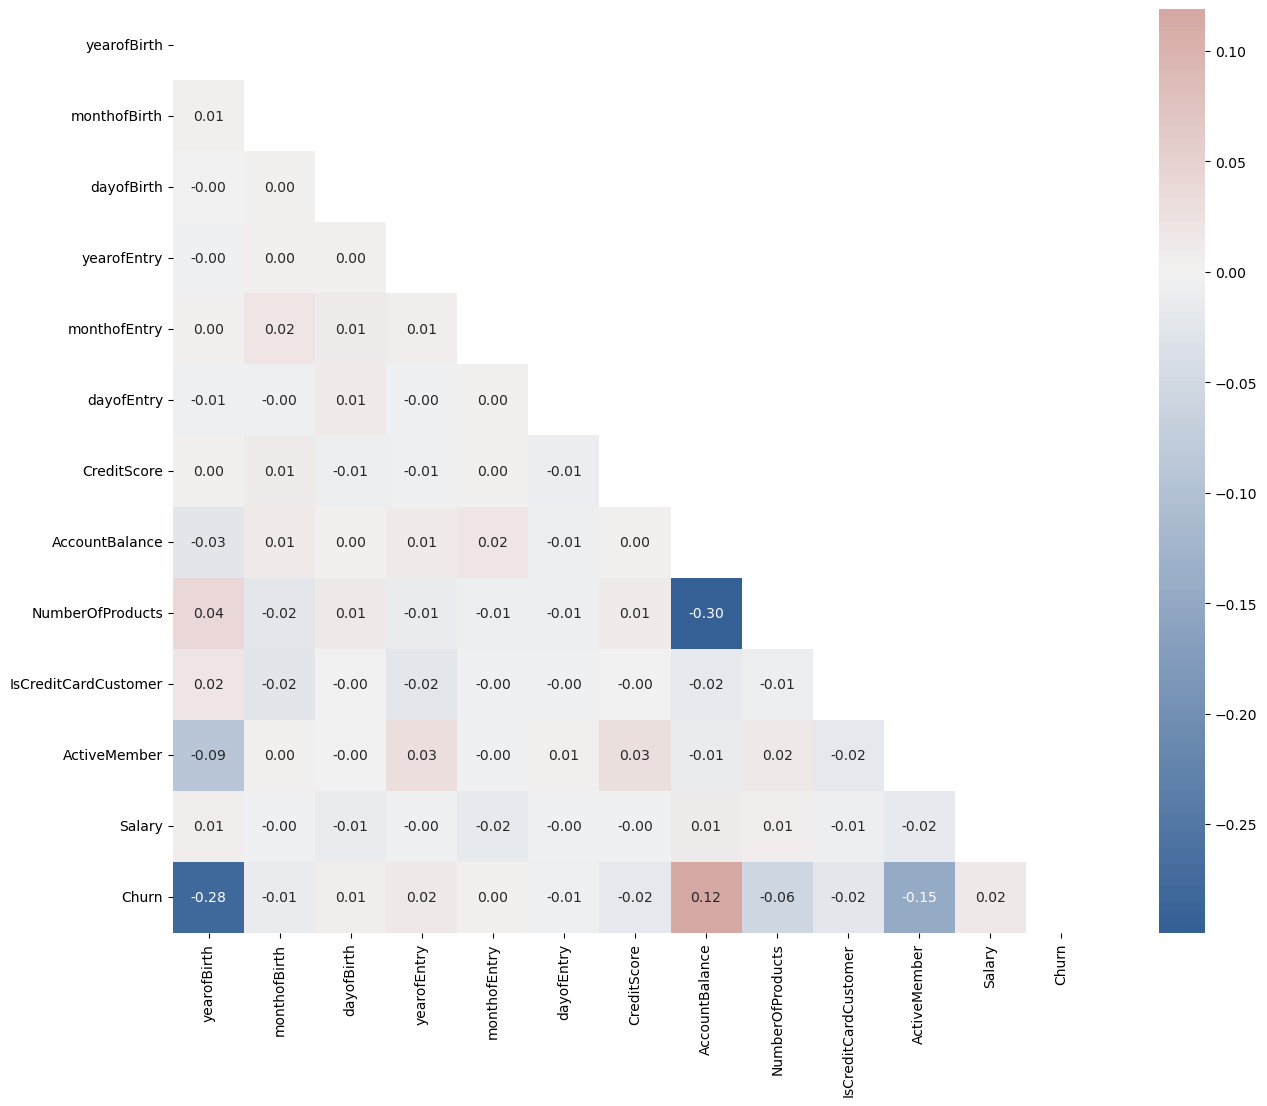

In [294]:
matrix = Obtrain.corr()
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, center=0, annot=True,fmt='.2f', square=True, cmap=cmap)
plt.show()

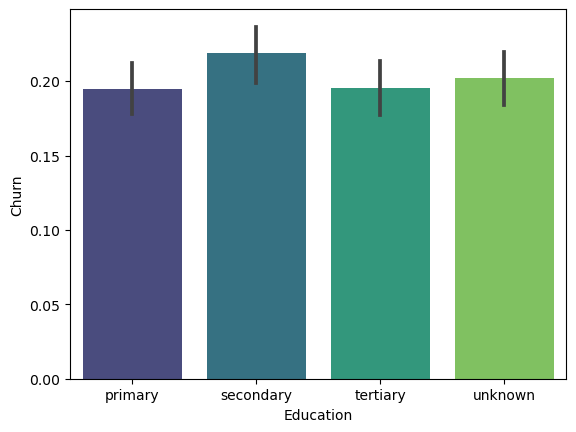

In [437]:
plt.figure()
sns.barplot(x='Education', y='Churn', data=Obtrain, palette='viridis')
plt.xlabel('Education')
plt.ylabel('Churn')
plt.title('')
plt.show()

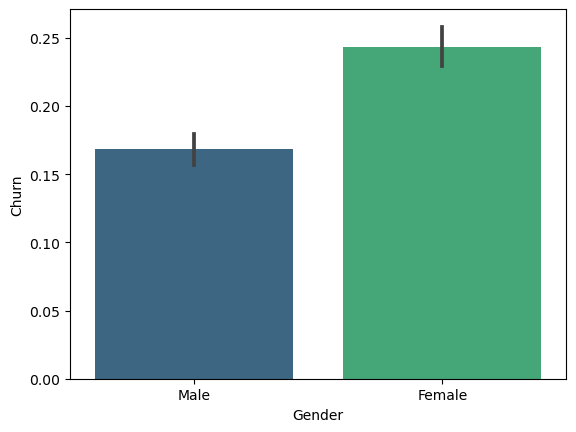

In [439]:
plt.figure()
sns.barplot(x='Gender', y='Churn', data=Obtrain, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Churn')
plt.title('')
plt.show()

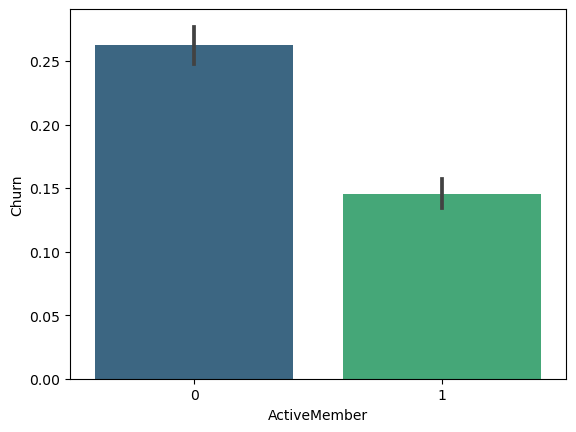

In [442]:
plt.figure()
sns.barplot(x='ActiveMember', y='Churn', data=Obtrain, palette='viridis')
plt.xlabel('ActiveMember')
plt.ylabel('Churn')
plt.title('')
plt.show()

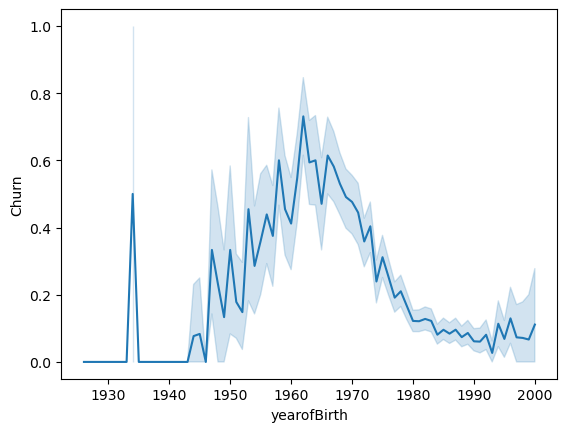

In [443]:
plt.figure()
sns.lineplot(x='yearofBirth', y='Churn', data=Obtrain, palette='viridis')
plt.xlabel('yearofBirth')
plt.ylabel('Churn')
plt.title('')
plt.show()


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
btrain.columns

Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn'],
      dtype='object')

In [23]:
col_drop = [ 'CustomerID', 'CustomerName']
col_to_cat = ['Gender','Location','MaritalStatus', 'Education','Education','Occupation','Ownhouse']

for col in col_to_cat:
    btrain[col] = btrain[col].astype('category')
btrain.dtypes

CustomerID                object
CustomerName              object
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer       int64
ActiveMember               int64
Salary                   float64
Churn                      int64
dtype: object

In [24]:
banktr = btrain.drop(columns=col_drop ,axis = 1)

In [25]:
banktr

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,1980,5,12,2014,11,28,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,1986,12,28,2011,8,17,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,1999,11,23,2013,12,9,Male,Location13,secondary,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0
3,1969,4,6,2015,12,12,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,1993,6,15,2012,10,10,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,1980,12,12,2014,12,14,Female,Location12,unknown,married,admin.,yes,593,129499.42,1,1,1,154071.27,0
7356,1951,9,27,2013,2,7,Male,Location13,primary,divorced,retired,no,796,0.00,2,0,1,54871.02,0
7357,1958,12,21,2011,2,28,Male,Location11,tertiary,married,management,yes,499,76961.60,2,1,1,83643.87,0
7358,1985,4,28,2012,12,18,Female,Location11,secondary,single,admin.,yes,685,0.00,2,0,1,186785.01,0


In [26]:
banktr = pd.get_dummies(banktr,drop_first=True,dtype='int8')

In [27]:
banktr

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,...,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes
0,1980,5,12,2014,11,28,716,0.00,2,1,...,0,0,1,0,0,0,0,0,0,0
1,1986,12,28,2011,8,17,568,169399.60,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1999,11,23,2013,12,9,739,89750.21,1,1,...,1,0,0,0,0,0,0,1,1,0
3,1969,4,6,2015,12,12,678,204510.94,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1993,6,15,2012,10,10,670,0.00,2,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,1980,12,12,2014,12,14,593,129499.42,1,1,...,1,0,0,0,0,0,0,0,0,1
7356,1951,9,27,2013,2,7,796,0.00,2,0,...,0,0,0,1,0,0,0,0,0,0
7357,1958,12,21,2011,2,28,499,76961.60,2,1,...,1,0,1,0,0,0,0,0,0,1
7358,1985,4,28,2012,12,18,685,0.00,2,0,...,0,1,0,0,0,0,0,0,0,1


In [444]:
banktr.columns

Index(['yearofBirth', 'monthofBirth', 'dayofBirth', 'yearofEntry',
       'monthofEntry', 'dayofEntry', 'CreditScore', 'AccountBalance',
       'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary',
       'Churn', 'Gender_Male', 'Location_Location12', 'Location_Location13',
       'Education_secondary', 'Education_tertiary', 'Education_unknown',
       'MaritalStatus_married', 'MaritalStatus_single',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_technician', 'Occupation_unknown', 'Ownhouse_unknown',
       'Ownhouse_yes'],
      dtype='object')

## ANN

In [445]:
X = banktr.drop(['Churn','monthofBirth', 'dayofBirth','monthofEntry', 'dayofEntry','Ownhouse_unknown',
       'Ownhouse_yes'],axis=1)
y = banktr['Churn']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [446]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [447]:
np.random.seed(42)
tf.random.set_seed(42)

In [448]:
X_train.shape

(4140, 22)

In [449]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[22]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [450]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                690       
                                                                 
 dense_25 (Dense)            (None, 30)                930       
                                                                 
 dense_26 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])

In [46]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
130/130 [==============================] - 1s 6ms/step - loss: 0.3108 - mae: 0.4235 - val_loss: 0.2785 - val_mae: 0.4029
Epoch 2/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2682 - mae: 0.3969 - val_loss: 0.2531 - val_mae: 0.3841
Epoch 3/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2438 - mae: 0.3800 - val_loss: 0.2374 - val_mae: 0.3718
Epoch 4/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2279 - mae: 0.3683 - val_loss: 0.2265 - val_mae: 0.3628
Epoch 5/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2165 - mae: 0.3598 - val_loss: 0.2183 - val_mae: 0.3561
Epoch 6/20
130/130 [==============================] - 0s 2ms/step - loss: 0.2081 - mae: 0.3527 - val_loss: 0.2115 - val_mae: 0.3517
Epoch 7/20
130/130 [==============================] - 0s 4ms/step - loss: 0.2012 - mae: 0.3479 - val_loss: 0.2064 - val_mae: 0.3474
Epoch 8/20
130/130 [==============================] - 0s 2ms/step - loss: 0.

In [47]:
mae_test = model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 2ms/step - loss: 0.1746 - mae: 0.3222


In [48]:
model_history.history

{'loss': [0.31082603335380554,
  0.2681654095649719,
  0.24375887215137482,
  0.22787755727767944,
  0.21651914715766907,
  0.20805515348911285,
  0.2012365609407425,
  0.19569779932498932,
  0.19104792177677155,
  0.1871616095304489,
  0.18375824391841888,
  0.18068893253803253,
  0.17808255553245544,
  0.17561617493629456,
  0.17357774078845978,
  0.17159315943717957,
  0.1697746217250824,
  0.16809971630573273,
  0.16660724580287933,
  0.16523343324661255],
 'mae': [0.42353689670562744,
  0.3969072997570038,
  0.3800206184387207,
  0.3683421313762665,
  0.35980674624443054,
  0.35273414850234985,
  0.34794244170188904,
  0.34345296025276184,
  0.3380085229873657,
  0.3360414505004883,
  0.33258968591690063,
  0.3300526738166809,
  0.32621586322784424,
  0.3237149119377136,
  0.32358217239379883,
  0.3204455077648163,
  0.3188427984714508,
  0.31753137707710266,
  0.3154985308647156,
  0.31406283378601074],
 'val_loss': [0.2784835994243622,
  0.25306156277656555,
  0.2374131530523300

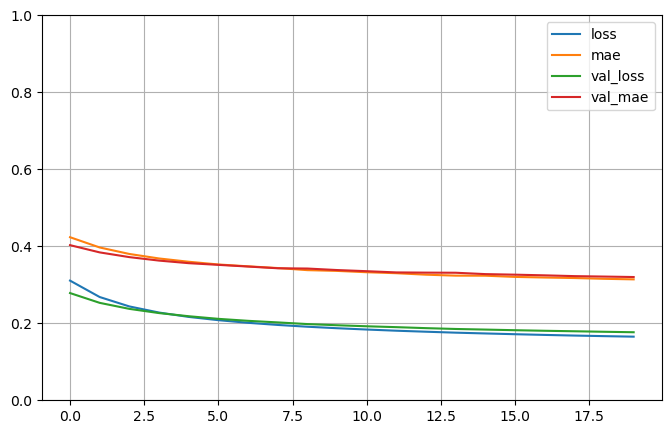

In [49]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

### ANN With callbacks

In [229]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [453]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[22]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [232]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [233]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [455]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])


In [235]:
# model2.compile(loss="mean_squared_error", 
#               optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
#               metrics=['mae'])

In [456]:
history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
130/130 [==============================] - 2s 6ms/step - loss: 1.6462 - acc: 0.7111 - f1_m: 0.2702 - precision_m: 0.2868 - recall_m: 0.2967 - val_loss: 1.2207 - val_acc: 0.7623 - val_f1_m: 0.2573 - val_precision_m: 0.3827 - val_recall_m: 0.2161
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 1.1922 - acc: 0.7664 - f1_m: 0.3115 - precision_m: 0.3917 - recall_m: 0.2938 - val_loss: 0.9318 - val_acc: 0.7703 - val_f1_m: 0.3430 - val_precision_m: 0.4624 - val_recall_m: 0.3129
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 1.0226 - acc: 0.7836 - f1_m: 0.3321 - precision_m: 0.4510 - recall_m: 0.2966 - val_loss: 0.9497 - val_acc: 0.7855 - val_f1_m: 0.2750 - val_precision_m: 0.4531 - val_recall_m: 0.2228
Epoch 4/100
130/130 [==============================] - 0s 4ms/step - loss: 0.9268 - acc: 0.7713 - f1_m: 0.3524 - precision_m: 0.4204 - recall_m: 0.3373 - val_loss: 0.7760 - val_acc: 0.7601 - val_f1_m: 0.4109 - val_precision_m: 0.

In [457]:
# model2 = keras.models.load_model("early_stop_model.h5")
F1_test = model2.evaluate(X_test, y_test)

58/58 [==============================] - 0s 1ms/step - loss: 0.6033 - acc: 0.8158 - f1_m: 0.4113 - precision_m: 0.5633 - recall_m: 0.3550


In [458]:
loss, accuracy, f1_score, precision, recall = model2.evaluate(X_test, y_test, verbose=0)

In [459]:
f1_score

0.4113330841064453

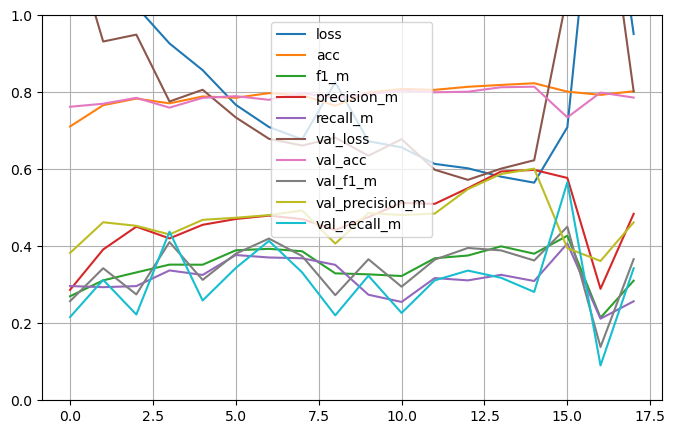

In [460]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [461]:
def plot(model_history, plot_type):
    val_type = "val_"+plot_type
    plt.plot(model_history.history[plot_type])
    plt.plot(model_history.history[val_type])
    plt.title('Plot')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [462]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


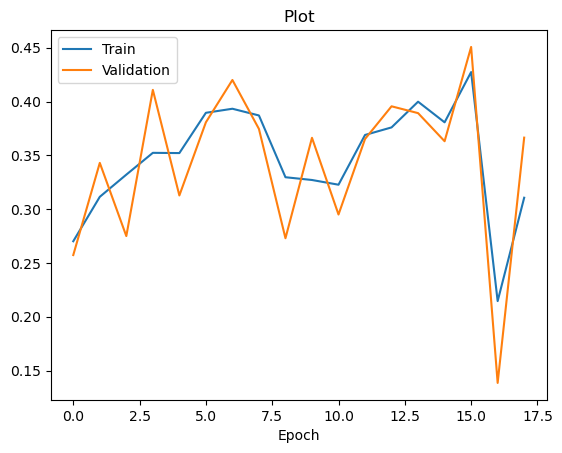

In [463]:
plot(history, 'f1_m')

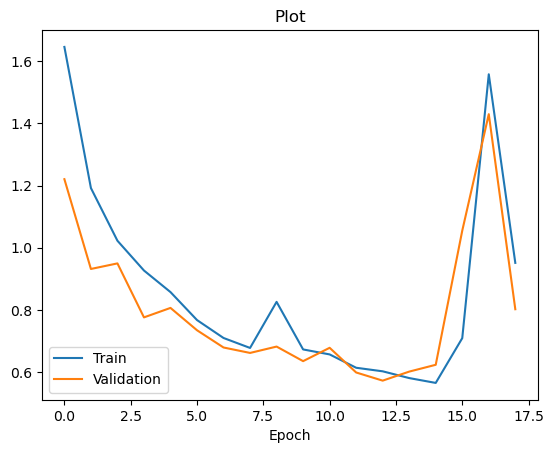

In [475]:
plot(history, 'loss')

In [476]:
test_pred=(model2.predict(X_test) > 0.5).astype("int32")
train_pred=(model2.predict(X_train) > 0.5).astype("int32")

130/130 [==============================] - 0s 2ms/step


In [477]:
confusion_matrix(y_train, train_pred)

array([[3044,  265],
       [ 519,  312]], dtype=int64)

In [478]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [479]:
train_accuracy_1= accuracy_score(y_train,train_pred)
train_recall_1= recall_score(y_train,train_pred)
train_precision_1= precision_score(y_train,train_pred)

test_accuracy_1= accuracy_score(y_test,test_pred)
test_recall_1= recall_score(y_test,test_pred)
test_precision_1= precision_score(y_test,test_pred)

In [480]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3309
           1       0.54      0.38      0.44       831

    accuracy                           0.81      4140
   macro avg       0.70      0.65      0.66      4140
weighted avg       0.79      0.81      0.80      4140



### Validating Test Model 

In [486]:
btest

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,C5458876,Name_5458876,1980,3,11,2016,4,28,Male,Location11,unknown,single,technician,no,535,119272.29,1,0,0,195896.59
1836,C4306823,Name_4306823,1982,5,19,2009,11,8,Male,Location11,primary,divorced,unknown,no,711,137688.71,1,1,1,46884.10
1837,C2409933,Name_2409933,1983,10,7,2009,7,16,Female,Location12,unknown,divorced,admin.,no,603,145623.36,1,1,0,163181.62
1838,C5212350,Name_5212350,1995,2,13,2012,11,23,Male,Location12,unknown,single,self-employed,no,536,92366.72,2,1,0,120661.71


In [490]:
col_drop = [ 'CustomerID', 'CustomerName','monthofBirth', 'dayofBirth','monthofEntry', 'dayofEntry','Ownhouse']
col_to_cat = ['Gender','Location','MaritalStatus', 'Education','Education','Occupation','Ownhouse']

for col in col_to_cat:
    btest[col] = btest[col].astype('category')
btest.dtypes
bt = btest.drop(columns=col_drop ,axis = 1)
bt

,yearofBirth,yearofEntry,Gender,Location,Education,MaritalStatus,Occupation,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,1972,2015,Male,Location13,unknown,single,management,624,0.00,2,1,1,62825.03
1,1990,2016,Female,Location11,primary,married,admin.,777,134571.50,1,0,1,118313.38
2,1966,2011,Female,Location13,primary,married,admin.,707,0.00,1,1,0,109688.82
3,1983,2016,Male,Location11,secondary,divorced,management,746,172274.01,1,1,0,22374.97
4,1983,2009,Male,Location11,tertiary,divorced,management,762,0.00,2,1,1,43075.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1980,2016,Male,Location11,unknown,single,technician,535,119272.29,1,0,0,195896.59
1836,1982,2009,Male,Location11,primary,divorced,unknown,711,137688.71,1,1,1,46884.10
1837,1983,2009,Female,Location12,unknown,divorced,admin.,603,145623.36,1,1,0,163181.62
1838,1995,2012,Male,Location12,unknown,single,self-employed,536,92366.72,2,1,0,120661.71


In [491]:
bt = pd.get_dummies(bt,drop_first=True,dtype='int8')
bts = scaler.fit_transform(bt)

In [492]:
bts.shape


(1840, 22)

In [493]:
testpreds = (model2.predict(bts) > 0.5).astype("int32")

58/58 [==============================] - 0s 1ms/step


In [494]:
bt['Churn'] = testpreds

In [495]:
bt

,yearofBirth,yearofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Gender_Male,Location_Location12,...,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Churn
0,1972,2015,624,0.00,2,1,1,62825.03,1,0,...,1,0,1,1,0,0,0,0,0,0
1,1990,2016,777,134571.50,1,0,1,118313.38,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1966,2011,707,0.00,1,1,0,109688.82,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1983,2016,746,172274.01,1,1,0,22374.97,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1983,2009,762,0.00,2,1,1,43075.70,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1980,2016,535,119272.29,1,0,0,195896.59,1,0,...,1,0,1,0,0,0,0,1,0,0
1836,1982,2009,711,137688.71,1,1,1,46884.10,1,0,...,0,0,0,0,0,0,0,0,1,0
1837,1983,2009,603,145623.36,1,1,0,163181.62,0,1,...,1,0,0,0,0,0,0,0,0,1
1838,1995,2012,536,92366.72,2,1,0,120661.71,1,1,...,1,0,1,0,0,1,0,0,0,0


In [496]:
Final_DF = pd.DataFrame(btest['CustomerID'])
Final_DF['Churn'] = bt['Churn']
Final_DF

,CustomerID,Churn
0,C5993228,0
1,C6546925,0
2,C7491750,0
3,C8462011,0
4,C3187447,0
...,...,...
1835,C5458876,0
1836,C4306823,0
1837,C2409933,1
1838,C5212350,0


In [497]:
Final_DF.to_csv('Submission5.csv', index = False)

## Auto Encoder

In [267]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [272]:
X = banktr.drop(['Churn'],axis=1)
y = banktr['Churn']

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/200
309/309 - 4s - loss: 0.1751 - val_loss: 0.0765 - 4s/epoch - 12ms/step
Epoch 2/200
309/309 - 1s - loss: 0.0753 - val_loss: 0.0564 - 901ms/epoch - 3ms/step
Epoch 3/200
309/309 - 1s - loss: 0.0648 - val_loss: 0.0489 - 866ms/epoch - 3ms/step
Epoch 4/200
309/309 - 1s - loss: 0.0587 - val_loss: 0.0441 - 1s/epoch - 3ms/step
Epoch 5/200
309/309 - 1s - loss: 0.0550 - val_loss: 0.0409 - 1s/epoch - 3ms/step
Epoch 6/200
309/309 - 1s - loss: 0.0521 - val_loss: 0.0382 - 1s/epoch - 3ms/step
Epoch 7/200
309/309 - 1s - loss: 0.0497 - val_loss: 0.0362 - 1s/epoch - 3ms/step
Epoch 8/200
309/309 - 1s - loss: 0.0479 - val_loss: 0.0348 - 1s/epoch - 3ms/step
Epoch 9/200
309/309 - 1s - loss: 0.0471 - val_loss: 0.0331 - 995ms/epoch - 3ms/step
Epoch 10/200
309/309 - 1s - loss: 0.0456 - val_loss: 0.0320 - 955ms/epoch - 3ms/step
Epoch 11/200
309/309 - 1s -

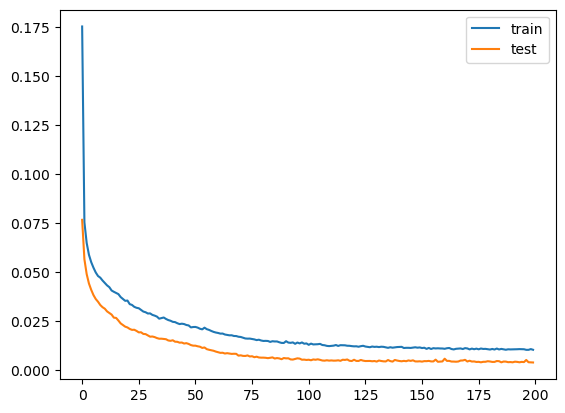

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [273]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
modelAE = Model(inputs=visible, outputs=output)
# compile autoencoder model
modelAE.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(modelAE, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
historyAE = modelAE.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(historyAE.history['loss'], label='train')
pyplot.plot(historyAE.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

### Logistic regression model 

In [279]:
from sklearn.linear_model import LogisticRegression
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
modelLog = LogisticRegression()
# fit model on training set
modelLog.fit(X_train, y_train)
# make prediction on test set
yhat = modelLog.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8246191848497324


#### Using encoder 

In [280]:
#encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
modelE = LogisticRegression()
# fit the model on the training set
modelE.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = modelE.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

76/76 [==============================] - 0s 3ms/step
0.7982708933717579


In [286]:
X = banktr.drop(['Churn'],axis=1)
X = encoder.predict(X)
y = banktr['Churn']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

230/230 [==============================] - 0s 1ms/step


In [288]:
model3 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[14]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
checkpoint_cb = keras.callbacks.ModelCheckpoint("Encodermodel.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

history = model3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
130/130 [==============================] - 2s 4ms/step - loss: 3.0962 - acc: 0.7993 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.1744 - val_acc: 0.7942 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0962 - acc: 0.7993 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.1744 - val_acc: 0.7942 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0962 - acc: 0.7993 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.1744 - val_acc: 0.7942 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0962 - acc: 0.7993 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.00

In [290]:
loss, accuracy, f1_score, precision, recall = model3.evaluate(X_test, y_test, verbose=0)

In [291]:
f1_score

0.0

## Random Forest

In [297]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [353]:
X = banktr.drop(['Churn'],axis=1)
y = banktr['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=225)
X_train = encoder.predict(X_train) 
X_test = encoder.predict(X_test) 
pd.value_counts(y_train)/y_train.size * 100

69/69 [==============================] - 0s 1ms/step


0    79.638975
1    20.361025
Name: Churn, dtype: float64

In [354]:
# X_train.dtypes

In [355]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [356]:
clf1 = RandomForestClassifier(n_estimators=100)

In [357]:
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [358]:
features = btrain.columns
importances = clf1.feature_importances_
print(importances)

indices = np.argsort(importances)[::-1]
print(indices)

[0.06947837 0.07739275 0.07023113 0.07495391 0.06841459 0.07341769
 0.07005251 0.07176125 0.07447875 0.06956278 0.06835308 0.06741582
 0.06730031 0.07718706]
[ 1 13  3  8  5  7  2  6  9  0  4 10 11 12]


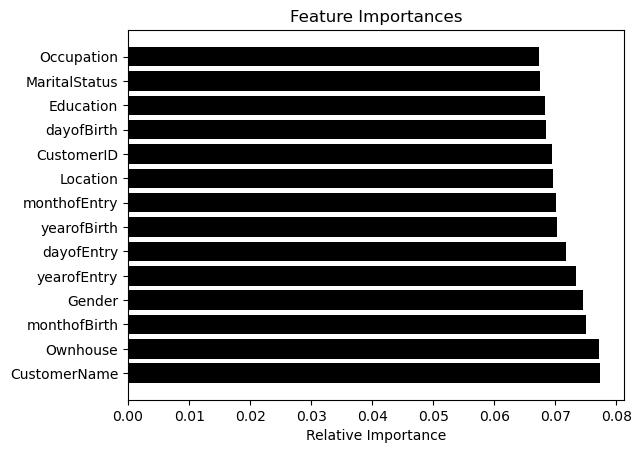

In [359]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [360]:
train_pred = clf1.predict(X_train)
test_pred = clf1.predict(X_test)

In [361]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred)) 

In [362]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[4103    0]
 [   0 1049]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[1644  121]
 [ 412   31]]
Accurcay :  0.7586050724637681
Recall   :  0.06997742663656885
Precision:  0.20394736842105263


In [363]:
bts_encode = encoder.predict(bts)
testpreds2 = (clf1.predict(bts_encode) > 0.5).astype("int32")
bt['Churn2'] = testpreds2
DF2 = pd.DataFrame(btest['CustomerID'])
DF2['Churn'] = bt['Churn2']
#DF2.to_csv('SubmissionEncodedRF.csv', index = False)

58/58 [==============================] - 0s 1ms/step


In [423]:
f1score = (2*precision_score(y_test,test_pred)*recall_score(y_test, test_pred))/(precision_score(y_test,test_pred)+recall_score(y_test, test_pred))
f1score

0.10420168067226891

### Ensamble model

In [378]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [367]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [392]:
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
   meta_X = list()
   for name, model in models:
 # predict with base model
        yhat = model.predict(X_test)
 # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
 # store prediction
        meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
        meta_X = hstack(meta_X)
        return blender.predict(meta_X)

In [368]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [399]:
# fit the blending ensemble
def fit_ensemble(models, Xtrain, Xval, ytrain, yval):
 # fit all models on the training set and predict on hold out set
 meta_X = list()
 for name, model in models:
 # fit in training set
    model.fit(Xtrain, ytrain)
 # predict on hold out set
    yhat = model.predict(Xval)
 # reshape predictions into a matrix with one column
    yhat = yhat.reshape(len(yhat), 1)
 # store predictions as input for blending
    meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
 # define blending model
    blender = LogisticRegression()
 # fit on predictions from base models
    blender.fit(meta_X, yval)
    return blender

AttributeError: 'numpy.ndarray' object has no attribute 'head'

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,...,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes
0,1980,5,12,2014,11,28,716,0.00,2,1,...,0,0,1,0,0,0,0,0,0,0
1,1986,12,28,2011,8,17,568,169399.60,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1999,11,23,2013,12,9,739,89750.21,1,1,...,1,0,0,0,0,0,0,1,1,0
3,1969,4,6,2015,12,12,678,204510.94,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1993,6,15,2012,10,10,670,0.00,2,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,1980,12,12,2014,12,14,593,129499.42,1,1,...,1,0,0,0,0,0,0,0,0,1
7356,1951,9,27,2013,2,7,796,0.00,2,0,...,0,0,0,1,0,0,0,0,0,0
7357,1958,12,21,2011,2,28,499,76961.60,2,1,...,1,0,1,0,0,0,0,0,0,1
7358,1985,4,28,2012,12,18,685,0.00,2,0,...,0,1,0,0,0,0,0,0,0,1


In [420]:
# example of making a prediction with a blending ensemble for classification
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# get the dataset
def get_dataset():
	X = banktr.drop(['Churn'],axis=1)
	y = banktr['Churn']
	return X, y

# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for _, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict_proba(X_val)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_val):
	# make predictions with base models
	meta_X = list()
	for _, model in models:
		# predict with base model
		yhat = model.predict_proba(X_val)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)

# define dataset
X, y = get_dataset()
# split dataset set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=121)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_test)
# summarize data split
print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make a prediction on a new row of data
row= bts
yhat = predict_ensemble(models, blender, row)
# summarize prediction
bt['Churn3'] = yhat
DF3 = pd.DataFrame(btest['CustomerID'])
DF3['Churn'] = bt['Churn3']

Train: (5152, 28), Val: (2208, 28)


In [421]:
bt

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,...,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes,Churn,Churn2,Churn3
0,1972,5,5,2015,12,16,624,0.00,2,1,...,0,0,0,0,0,0,1,0,0,0
1,1990,12,27,2016,11,26,777,134571.50,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1966,7,25,2011,10,24,707,0.00,1,1,...,0,0,0,0,0,0,1,1,0,0
3,1983,7,7,2016,7,9,746,172274.01,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1983,8,9,2009,5,15,762,0.00,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1980,3,11,2016,4,28,535,119272.29,1,0,...,0,0,0,1,0,0,0,0,0,0
1836,1982,5,19,2009,11,8,711,137688.71,1,1,...,0,0,0,0,1,0,0,0,0,0
1837,1983,10,7,2009,7,16,603,145623.36,1,1,...,0,0,0,0,0,0,0,0,0,0
1838,1995,2,13,2012,11,23,536,92366.72,2,1,...,0,1,0,0,0,0,0,0,0,0


In [422]:
bt.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,...,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes,Churn,Churn2,Churn3
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,...,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.0
mean,1979.079348,6.428261,14.646739,2013.067391,6.496739,14.621196,650.783152,75116.590674,1.554348,0.707609,...,0.050543,0.108152,0.103261,0.095109,0.096196,0.032065,0.454891,0.104891,0.486413,0.0
std,10.722776,3.446675,8.205039,2.877756,3.468336,8.081591,96.329207,62614.929825,0.602950,0.454985,...,0.219123,0.310657,0.304382,0.293445,0.294940,0.176221,0.498096,0.306497,0.499951,0.0
min,1937.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,363.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1974.000000,4.000000,7.750000,2011.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1981.000000,6.000000,15.000000,2013.000000,7.000000,15.000000,651.000000,97372.095000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1986.000000,9.000000,22.000000,2016.000000,9.000000,22.000000,718.000000,127735.702500,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,205770.780000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [424]:
DF3.to_csv('SubmissionEnsamble.csv', index = False)

### Business Approach

The bank is facing high churn in recent times and would like to know who might switch banks among their customers. Therefore a dataset is given where the data exists of 7360 customers and if they have adopted for churn or not. 
From the given dataset we are required to create a model which could analyze and understand the patterns with the given data if they are likely to switch the banks or not 
From the predicted values the banks can take required measures to prevent churn.

#### Company gain

New customers rate is low therefore the profit comes from the existing customers, if the existing customers switch there is a reduction in profit for the bank.
From the predicted values it can be observed which customer ID is likely to undergo churn and preventive measures can be taken accordingly. 
This reduces the high churn which is ongoing, preserving the profit rate which is not increasing as new customers are very less.

#### Challenges faced

Data given by the bank is not completely explainable, Example : No of Products, we do not have the data as what this actually corresponds to.
Customer name and customer ID are unique
Own House is highly correlated with Marital status 

#### Techniques to overcome challenges

Data given if not self explanatory, the data has to be treated as an unseen data. If articulation of the feature is not possible, analytics is still possible. 
Customer Name and Customer ID are dropped
Own House is Dropped 